In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import sys
import re

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SINCHANA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SINCHANA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SINCHANA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [4]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Reading the csv files and concating it to a single data frame

In [ ]:
#df = pd.read_csv('Downloads/_com1.csv', usecols = [1,2,3,4])

In [ ]:
#df1 = pd.read_csv('Downloads/_com3.csv', usecols = [4,5,6,7])

In [ ]:
#df2 = pd.read_csv('Downloads/_com4.csv', usecols = [4,5,6,7])

In [ ]:
#final_data = pd.concat([df,df1,df2])

In [5]:
final_data = pd.read_csv('final_email_dataset.csv')

In [6]:
final_data

,subject,body,category,Text
0,Get placed in unicorns hyper growth startups ...,"Hey ,Which is your dream company? Chances are ...",spam,Get placed in unicorns hyper growth startups ...
1,Your call to work at top tech companies with h...,"Hey ,With a whopping average salary hike of 89...",spam,Your call to work at top tech companies with h...
2,Hey the highest paying job in 2022 can be yours.,"Hey ,Software engineering is one of the highes...",spam,Hey the highest paying job in 2022 can be you...
3,Here âs your ticket to the big leagues (Goog...,"Hey ,At IITs, computer science students get jo...",spam,Here âs your ticket to the big leagues (Goog...
4,Go anywhere with Uber Intercity,A better way to get away Go out-of-town anytim...,spam,Go anywhere with Uber Intercity A better way t...
...,...,...,...,...
885,PSGCAS - Admissions 2022,"Admissions 2022 - PSG CAS. Dear AKHILA CHACKO,...",ham,PSGCAS - Admissions 2022 Admissions 2022 - PSG...
886,PSGCAS - Admissions 2022,"Admissions 2020 - PSG CAS. Dear Applicant, We ...",ham,PSGCAS - Admissions 2022 Admissions 2020 - PSG...
887,CUIWPS RECEIPT,Calicut University Challan Number-: 222313043 ...,ham,CUIWPS RECEIPT Calicut University Challan Numb...
888,PSG CAS Admission 2022 - 2023 - PG Programme M...,PSG CAS Admission 2022 - 2023 - PG Programme M...,ham,PSG CAS Admission 2022 - 2023 - PG Programme M...


In [ ]:
# final_data.to_csv("final_email_dataset.csv", index = False)

In [ ]:
# to drop 'date', 'from' and 'to' columns 
#final_data1 = final_data.drop(['date','to','from'],axis = 1)

Drop duplicates and change the data type of category column to 'category'

In [7]:
# remove duplicates
final_data.drop_duplicates(ignore_index = True, inplace = True)

In [8]:
final_data.dropna(inplace = True)

In [9]:
# find the number of missing values in each column
final_data.isnull().sum()

subject     0
body        0
category    0
Text        0
dtype: int64

In [10]:
final_data['category'].astype('category')

0      spam
1      spam
2      spam
3      spam
4      spam
       ... 
872     ham
873     ham
874     ham
875     ham
876     ham
Name: category, Length: 877, dtype: category
Categories (2, object): [ham, spam]

In [11]:
final_data['category'].value_counts()

ham     575
spam    302
Name: category, dtype: int64

Data_Cleaning

1. Remove special characters and convert to lower case

In [12]:
def data_clean(text):
    #remove all special characters and converts the text to lower case
    text = re.sub(r'[^A-Za-z0-9]+',' ', str(text)).lower()
    return text

In [13]:
#clean subject and body
final_data['cleaned_text'] = final_data['Text'].apply(data_clean)
#final_data['cleaned_body'] = final_data['body'].apply(data_clean)

In [14]:
final_data.head(20)

,subject,body,category,Text,cleaned_text
0,Get placed in unicorns hyper growth startups ...,"Hey ,Which is your dream company? Chances are ...",spam,Get placed in unicorns hyper growth startups ...,get placed in unicorns hyper growth startups a...
1,Your call to work at top tech companies with h...,"Hey ,With a whopping average salary hike of 89...",spam,Your call to work at top tech companies with h...,your call to work at top tech companies with h...
2,Hey the highest paying job in 2022 can be yours.,"Hey ,Software engineering is one of the highes...",spam,Hey the highest paying job in 2022 can be you...,hey the highest paying job in 2022 can be your...
3,Here âs your ticket to the big leagues (Goog...,"Hey ,At IITs, computer science students get jo...",spam,Here âs your ticket to the big leagues (Goog...,here s your ticket to the big leagues google a...
4,Go anywhere with Uber Intercity,A better way to get away Go out-of-town anytim...,spam,Go anywhere with Uber Intercity A better way t...,go anywhere with uber intercity a better way t...
5,Learn Software Architecture with Python [free ...,Here are this week's five links that are worth...,spam,Learn Software Architecture with Python [free ...,learn software architecture with python free 5...
6,This is your sign to work at a product-based c...,"Hey ,What does it take to crack a job at a pro...",spam,This is your sign to work at a product-based c...,this is your sign to work at a product based c...
7,Item Due Reminder,"Dear SINCHANA R, The following item is now due...",ham,"Item Due Reminder Dear SINCHANA R, The followi...",item due reminder dear sinchana r the followin...
8,Sinchana,thanks for being a valued member,ham,Sinchana thanks for being a valued member,sinchana thanks for being a valued member
9,Sinchana,â¹30 off with Google Pay Offer expires 30th ...,spam,Sinchana â¹30 off with Google Pay Offer expi...,sinchana 30 off with google pay offer expires ...


In [15]:
final_data.tail(50)

,subject,body,category,Text,cleaned_text
827,KERALA OPRS - OB Reference No.,E-Ticket OB-Ref KERALA STATE ROAD TRANSPORT CO...,ham,KERALA OPRS - OB Reference No E-Ticket OB-Ref ...,kerala oprs ob reference no e ticket ob ref ke...
828,Booking Confirmation,E-Ticket/Reservation Voucher KERALA STATE ROAD...,ham,Booking Confirmation E-Ticket/Reservation Vouc...,booking confirmation e ticket reservation vouc...
829,Cancel Tickets,KERALA STATE ROAD TRANSPORT CORPORATION Office...,ham,Cancel Tickets KERALA STATE ROAD TRANSPORT COR...,cancel tickets kerala state road transport cor...
830,Account information for new or modified users,A user account has been created or modified Us...,ham,Account information for new or modified users ...,account information for new or modified users ...
831,KERALA OPRS - OB Reference No.,E-Ticket OB-Ref KERALA STATE ROAD TRANSPORT CO...,ham,KERALA OPRS - OB Reference No E-Ticket OB-Ref ...,kerala oprs ob reference no e ticket ob ref ke...
832,Booking Confirmation,E-Ticket/Reservation Voucher KERALA STATE ROAD...,ham,Booking Confirmation E-Ticket/Reservation Vouc...,booking confirmation e ticket reservation vouc...
833,Cancel Tickets,KERALA STATE ROAD TRANSPORT CORPORATION Office...,ham,Cancel Tickets KERALA STATE ROAD TRANSPORT COR...,cancel tickets kerala state road transport cor...
834,KERALA OPRS - OB Reference No.,E-Ticket OB-Ref KERALA STATE ROAD TRANSPORT CO...,ham,KERALA OPRS - OB Reference No E-Ticket OB-Ref ...,kerala oprs ob reference no e ticket ob ref ke...
835,Booking Confirmation,E-Ticket/Reservation Voucher KERALA STATE ROAD...,ham,Booking Confirmation E-Ticket/Reservation Vouc...,booking confirmation e ticket reservation vouc...
836,KERALA OPRS - OB Reference No.,E-Ticket OB-Ref KERALA STATE ROAD TRANSPORT CO...,ham,KERALA OPRS - OB Reference No E-Ticket OB-Ref ...,kerala oprs ob reference no e ticket ob ref ke...


2. Tokenization: Converting the text into tokens

In [16]:
# tokenization
final_data['cleaned_text']= final_data['cleaned_text'].apply(word_tokenize)

In [ ]:
#final_data['cleaned_body']= final_data['cleaned_body'].apply(word_tokenize)

In [17]:
final_data

,subject,body,category,Text,cleaned_text
0,Get placed in unicorns hyper growth startups ...,"Hey ,Which is your dream company? Chances are ...",spam,Get placed in unicorns hyper growth startups ...,"[get, placed, in, unicorns, hyper, growth, sta..."
1,Your call to work at top tech companies with h...,"Hey ,With a whopping average salary hike of 89...",spam,Your call to work at top tech companies with h...,"[your, call, to, work, at, top, tech, companie..."
2,Hey the highest paying job in 2022 can be yours.,"Hey ,Software engineering is one of the highes...",spam,Hey the highest paying job in 2022 can be you...,"[hey, the, highest, paying, job, in, 2022, can..."
3,Here âs your ticket to the big leagues (Goog...,"Hey ,At IITs, computer science students get jo...",spam,Here âs your ticket to the big leagues (Goog...,"[here, s, your, ticket, to, the, big, leagues,..."
4,Go anywhere with Uber Intercity,A better way to get away Go out-of-town anytim...,spam,Go anywhere with Uber Intercity A better way t...,"[go, anywhere, with, uber, intercity, a, bette..."
...,...,...,...,...,...
872,PSGCAS - Admissions 2022,"Admissions 2022 - PSG CAS. Dear AKHILA CHACKO,...",ham,PSGCAS - Admissions 2022 Admissions 2022 - PSG...,"[psgcas, admissions, 2022, admissions, 2022, p..."
873,PSGCAS - Admissions 2022,"Admissions 2020 - PSG CAS. Dear Applicant, We ...",ham,PSGCAS - Admissions 2022 Admissions 2020 - PSG...,"[psgcas, admissions, 2022, admissions, 2020, p..."
874,CUIWPS RECEIPT,Calicut University Challan Number-: 222313043 ...,ham,CUIWPS RECEIPT Calicut University Challan Numb...,"[cuiwps, receipt, calicut, university, challan..."
875,PSG CAS Admission 2022 - 2023 - PG Programme M...,PSG CAS Admission 2022 - 2023 - PG Programme M...,ham,PSG CAS Admission 2022 - 2023 - PG Programme M...,"[psg, cas, admission, 2022, 2023, pg, programm..."


3. Remove stop words

In [18]:
def remove_sw(text):
    clean_text = [word for word in text if word not in stopwords.words('english')]
    return clean_text

In [19]:
#remove stopwords
final_data['cleaned_text'] = final_data['cleaned_text'].apply(remove_sw)

In [ ]:
#final_data['cleaned_body'] = final_data['cleaned_body'].apply(remove_sw)

In [20]:
final_data

,subject,body,category,Text,cleaned_text
0,Get placed in unicorns hyper growth startups ...,"Hey ,Which is your dream company? Chances are ...",spam,Get placed in unicorns hyper growth startups ...,"[get, placed, unicorns, hyper, growth, startup..."
1,Your call to work at top tech companies with h...,"Hey ,With a whopping average salary hike of 89...",spam,Your call to work at top tech companies with h...,"[call, work, top, tech, companies, high, payin..."
2,Hey the highest paying job in 2022 can be yours.,"Hey ,Software engineering is one of the highes...",spam,Hey the highest paying job in 2022 can be you...,"[hey, highest, paying, job, 2022, hey, softwar..."
3,Here âs your ticket to the big leagues (Goog...,"Hey ,At IITs, computer science students get jo...",spam,Here âs your ticket to the big leagues (Goog...,"[ticket, big, leagues, google, amazon, microso..."
4,Go anywhere with Uber Intercity,A better way to get away Go out-of-town anytim...,spam,Go anywhere with Uber Intercity A better way t...,"[go, anywhere, uber, intercity, better, way, g..."
...,...,...,...,...,...
872,PSGCAS - Admissions 2022,"Admissions 2022 - PSG CAS. Dear AKHILA CHACKO,...",ham,PSGCAS - Admissions 2022 Admissions 2022 - PSG...,"[psgcas, admissions, 2022, admissions, 2022, p..."
873,PSGCAS - Admissions 2022,"Admissions 2020 - PSG CAS. Dear Applicant, We ...",ham,PSGCAS - Admissions 2022 Admissions 2020 - PSG...,"[psgcas, admissions, 2022, admissions, 2020, p..."
874,CUIWPS RECEIPT,Calicut University Challan Number-: 222313043 ...,ham,CUIWPS RECEIPT Calicut University Challan Numb...,"[cuiwps, receipt, calicut, university, challan..."
875,PSG CAS Admission 2022 - 2023 - PG Programme M...,PSG CAS Admission 2022 - 2023 - PG Programme M...,ham,PSG CAS Admission 2022 - 2023 - PG Programme M...,"[psg, cas, admission, 2022, 2023, pg, programm..."


4. Lemmatization

In [21]:
wnl = nltk.WordNetLemmatizer()

In [22]:
final_data['cleaned_text'] = final_data['cleaned_text'].apply(
                    lambda lst:[wnl.lemmatize(word) for word in lst])

In [23]:
final_data

,subject,body,category,Text,cleaned_text
0,Get placed in unicorns hyper growth startups ...,"Hey ,Which is your dream company? Chances are ...",spam,Get placed in unicorns hyper growth startups ...,"[get, placed, unicorn, hyper, growth, startup,..."
1,Your call to work at top tech companies with h...,"Hey ,With a whopping average salary hike of 89...",spam,Your call to work at top tech companies with h...,"[call, work, top, tech, company, high, paying,..."
2,Hey the highest paying job in 2022 can be yours.,"Hey ,Software engineering is one of the highes...",spam,Hey the highest paying job in 2022 can be you...,"[hey, highest, paying, job, 2022, hey, softwar..."
3,Here âs your ticket to the big leagues (Goog...,"Hey ,At IITs, computer science students get jo...",spam,Here âs your ticket to the big leagues (Goog...,"[ticket, big, league, google, amazon, microsof..."
4,Go anywhere with Uber Intercity,A better way to get away Go out-of-town anytim...,spam,Go anywhere with Uber Intercity A better way t...,"[go, anywhere, uber, intercity, better, way, g..."
...,...,...,...,...,...
872,PSGCAS - Admissions 2022,"Admissions 2022 - PSG CAS. Dear AKHILA CHACKO,...",ham,PSGCAS - Admissions 2022 Admissions 2022 - PSG...,"[psgcas, admission, 2022, admission, 2022, psg..."
873,PSGCAS - Admissions 2022,"Admissions 2020 - PSG CAS. Dear Applicant, We ...",ham,PSGCAS - Admissions 2022 Admissions 2020 - PSG...,"[psgcas, admission, 2022, admission, 2020, psg..."
874,CUIWPS RECEIPT,Calicut University Challan Number-: 222313043 ...,ham,CUIWPS RECEIPT Calicut University Challan Numb...,"[cuiwps, receipt, calicut, university, challan..."
875,PSG CAS Admission 2022 - 2023 - PG Programme M...,PSG CAS Admission 2022 - 2023 - PG Programme M...,ham,PSG CAS Admission 2022 - 2023 - PG Programme M...,"[psg, ca, admission, 2022, 2023, pg, programme..."


# EDA

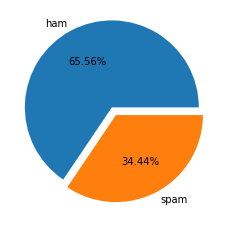

In [24]:
plt.pie(final_data['category'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

In [25]:
# for labeling spam as 1 and ham as 0
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [26]:
final_data['category']=encoder.fit_transform(final_data['category'])

In [29]:
final_data['num_characters'] = final_data['joined_str'].apply(len) 
final_data.head()

,subject,body,category,Text,cleaned_text,joined_str,num_characters
0,Get placed in unicorns hyper growth startups ...,"Hey ,Which is your dream company? Chances are ...",1,Get placed in unicorns hyper growth startups ...,"[get, placed, unicorn, hyper, growth, startup,...",getplacedunicornhypergrowthstartupglobalmncshe...,478
1,Your call to work at top tech companies with h...,"Hey ,With a whopping average salary hike of 89...",1,Your call to work at top tech companies with h...,"[call, work, top, tech, company, high, paying,...",callworktoptechcompanyhighpayingsalaryheywhopp...,405
2,Hey the highest paying job in 2022 can be yours.,"Hey ,Software engineering is one of the highes...",1,Hey the highest paying job in 2022 can be you...,"[hey, highest, paying, job, 2022, hey, softwar...",heyhighestpayingjob2022heysoftwareengineeringo...,420
3,Here âs your ticket to the big leagues (Goog...,"Hey ,At IITs, computer science students get jo...",1,Here âs your ticket to the big leagues (Goog...,"[ticket, big, league, google, amazon, microsof...",ticketbigleaguegoogleamazonmicrosoftheyiitscom...,394
4,Go anywhere with Uber Intercity,A better way to get away Go out-of-town anytim...,1,Go anywhere with Uber Intercity A better way t...,"[go, anywhere, uber, intercity, better, way, g...",goanywhereuberintercitybetterwaygetawaygotowna...,481


In [30]:
final_data['joined_str'] = final_data['cleaned_text'].apply(lambda x: ''.join(x))
final_data

,subject,body,category,Text,cleaned_text,joined_str,num_characters
0,Get placed in unicorns hyper growth startups ...,"Hey ,Which is your dream company? Chances are ...",1,Get placed in unicorns hyper growth startups ...,"[get, placed, unicorn, hyper, growth, startup,...",getplacedunicornhypergrowthstartupglobalmncshe...,478
1,Your call to work at top tech companies with h...,"Hey ,With a whopping average salary hike of 89...",1,Your call to work at top tech companies with h...,"[call, work, top, tech, company, high, paying,...",callworktoptechcompanyhighpayingsalaryheywhopp...,405
2,Hey the highest paying job in 2022 can be yours.,"Hey ,Software engineering is one of the highes...",1,Hey the highest paying job in 2022 can be you...,"[hey, highest, paying, job, 2022, hey, softwar...",heyhighestpayingjob2022heysoftwareengineeringo...,420
3,Here âs your ticket to the big leagues (Goog...,"Hey ,At IITs, computer science students get jo...",1,Here âs your ticket to the big leagues (Goog...,"[ticket, big, league, google, amazon, microsof...",ticketbigleaguegoogleamazonmicrosoftheyiitscom...,394
4,Go anywhere with Uber Intercity,A better way to get away Go out-of-town anytim...,1,Go anywhere with Uber Intercity A better way t...,"[go, anywhere, uber, intercity, better, way, g...",goanywhereuberintercitybetterwaygetawaygotowna...,481
...,...,...,...,...,...,...,...
872,PSGCAS - Admissions 2022,"Admissions 2022 - PSG CAS. Dear AKHILA CHACKO,...",0,PSGCAS - Admissions 2022 Admissions 2022 - PSG...,"[psgcas, admission, 2022, admission, 2022, psg...",psgcasadmission2022admission2022psgcadearakhil...,507
873,PSGCAS - Admissions 2022,"Admissions 2020 - PSG CAS. Dear Applicant, We ...",0,PSGCAS - Admissions 2022 Admissions 2020 - PSG...,"[psgcas, admission, 2022, admission, 2020, psg...",psgcasadmission2022admission2020psgcadearappli...,305
874,CUIWPS RECEIPT,Calicut University Challan Number-: 222313043 ...,0,CUIWPS RECEIPT Calicut University Challan Numb...,"[cuiwps, receipt, calicut, university, challan...",cuiwpsreceiptcalicutuniversitychallannumber222...,103
875,PSG CAS Admission 2022 - 2023 - PG Programme M...,PSG CAS Admission 2022 - 2023 - PG Programme M...,0,PSG CAS Admission 2022 - 2023 - PG Programme M...,"[psg, ca, admission, 2022, 2023, pg, programme...",psgcaadmission20222023pgprogrammemeritadmissio...,781


In [31]:
final_data['num_words'] = final_data['cleaned_text'].apply(len)
final_data.head()

,subject,body,category,Text,cleaned_text,joined_str,num_characters,num_words
0,Get placed in unicorns hyper growth startups ...,"Hey ,Which is your dream company? Chances are ...",1,Get placed in unicorns hyper growth startups ...,"[get, placed, unicorn, hyper, growth, startup,...",getplacedunicornhypergrowthstartupglobalmncshe...,478,86
1,Your call to work at top tech companies with h...,"Hey ,With a whopping average salary hike of 89...",1,Your call to work at top tech companies with h...,"[call, work, top, tech, company, high, paying,...",callworktoptechcompanyhighpayingsalaryheywhopp...,405,71
2,Hey the highest paying job in 2022 can be yours.,"Hey ,Software engineering is one of the highes...",1,Hey the highest paying job in 2022 can be you...,"[hey, highest, paying, job, 2022, hey, softwar...",heyhighestpayingjob2022heysoftwareengineeringo...,420,74
3,Here âs your ticket to the big leagues (Goog...,"Hey ,At IITs, computer science students get jo...",1,Here âs your ticket to the big leagues (Goog...,"[ticket, big, league, google, amazon, microsof...",ticketbigleaguegoogleamazonmicrosoftheyiitscom...,394,72
4,Go anywhere with Uber Intercity,A better way to get away Go out-of-town anytim...,1,Go anywhere with Uber Intercity A better way t...,"[go, anywhere, uber, intercity, better, way, g...",goanywhereuberintercitybetterwaygetawaygotowna...,481,85


In [32]:
final_data['num_sentences'] = final_data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
final_data.head()

,subject,body,category,Text,cleaned_text,joined_str,num_characters,num_words,num_sentences
0,Get placed in unicorns hyper growth startups ...,"Hey ,Which is your dream company? Chances are ...",1,Get placed in unicorns hyper growth startups ...,"[get, placed, unicorn, hyper, growth, startup,...",getplacedunicornhypergrowthstartupglobalmncshe...,478,86,8
1,Your call to work at top tech companies with h...,"Hey ,With a whopping average salary hike of 89...",1,Your call to work at top tech companies with h...,"[call, work, top, tech, company, high, paying,...",callworktoptechcompanyhighpayingsalaryheywhopp...,405,71,4
2,Hey the highest paying job in 2022 can be yours.,"Hey ,Software engineering is one of the highes...",1,Hey the highest paying job in 2022 can be you...,"[hey, highest, paying, job, 2022, hey, softwar...",heyhighestpayingjob2022heysoftwareengineeringo...,420,74,7
3,Here âs your ticket to the big leagues (Goog...,"Hey ,At IITs, computer science students get jo...",1,Here âs your ticket to the big leagues (Goog...,"[ticket, big, league, google, amazon, microsof...",ticketbigleaguegoogleamazonmicrosoftheyiitscom...,394,72,7
4,Go anywhere with Uber Intercity,A better way to get away Go out-of-town anytim...,1,Go anywhere with Uber Intercity A better way t...,"[go, anywhere, uber, intercity, better, way, g...",goanywhereuberintercitybetterwaygetawaygotowna...,481,85,7


In [33]:
final_data

,subject,body,category,Text,cleaned_text,joined_str,num_characters,num_words,num_sentences
0,Get placed in unicorns hyper growth startups ...,"Hey ,Which is your dream company? Chances are ...",1,Get placed in unicorns hyper growth startups ...,"[get, placed, unicorn, hyper, growth, startup,...",getplacedunicornhypergrowthstartupglobalmncshe...,478,86,8
1,Your call to work at top tech companies with h...,"Hey ,With a whopping average salary hike of 89...",1,Your call to work at top tech companies with h...,"[call, work, top, tech, company, high, paying,...",callworktoptechcompanyhighpayingsalaryheywhopp...,405,71,4
2,Hey the highest paying job in 2022 can be yours.,"Hey ,Software engineering is one of the highes...",1,Hey the highest paying job in 2022 can be you...,"[hey, highest, paying, job, 2022, hey, softwar...",heyhighestpayingjob2022heysoftwareengineeringo...,420,74,7
3,Here âs your ticket to the big leagues (Goog...,"Hey ,At IITs, computer science students get jo...",1,Here âs your ticket to the big leagues (Goog...,"[ticket, big, league, google, amazon, microsof...",ticketbigleaguegoogleamazonmicrosoftheyiitscom...,394,72,7
4,Go anywhere with Uber Intercity,A better way to get away Go out-of-town anytim...,1,Go anywhere with Uber Intercity A better way t...,"[go, anywhere, uber, intercity, better, way, g...",goanywhereuberintercitybetterwaygetawaygotowna...,481,85,7
...,...,...,...,...,...,...,...,...,...
872,PSGCAS - Admissions 2022,"Admissions 2022 - PSG CAS. Dear AKHILA CHACKO,...",0,PSGCAS - Admissions 2022 Admissions 2022 - PSG...,"[psgcas, admission, 2022, admission, 2022, psg...",psgcasadmission2022admission2022psgcadearakhil...,507,77,6
873,PSGCAS - Admissions 2022,"Admissions 2020 - PSG CAS. Dear Applicant, We ...",0,PSGCAS - Admissions 2022 Admissions 2020 - PSG...,"[psgcas, admission, 2022, admission, 2020, psg...",psgcasadmission2022admission2020psgcadearappli...,305,50,7
874,CUIWPS RECEIPT,Calicut University Challan Number-: 222313043 ...,0,CUIWPS RECEIPT Calicut University Challan Numb...,"[cuiwps, receipt, calicut, university, challan...",cuiwpsreceiptcalicutuniversitychallannumber222...,103,15,1
875,PSG CAS Admission 2022 - 2023 - PG Programme M...,PSG CAS Admission 2022 - 2023 - PG Programme M...,0,PSG CAS Admission 2022 - 2023 - PG Programme M...,"[psg, ca, admission, 2022, 2023, pg, programme...",psgcaadmission20222023pgprogrammemeritadmissio...,781,126,18


In [34]:
#magic statement DONOT remove
final_data['num_sentences'].sum()

8760

In [ ]:
# final_data['num_characters_before'] = final_data['Text'].apply(len) 
# final_data.head()

In [ ]:
# final_data['num_words_before'] = final_data['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
# final_data.head()

In [35]:
#ham
final_data[final_data['category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,575.000000,575.000000,575.000000
mean,1032.897391,166.514783,11.140870
std,815.142106,129.951235,9.054191
min,19.000000,4.000000,1.000000
25%,353.000000,54.000000,4.000000
50%,834.000000,137.000000,10.000000
75%,1606.000000,265.000000,16.000000
max,4403.000000,767.000000,71.000000


In [36]:
#spam
final_data[final_data['category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,302.000000,302.000000,302.000000
mean,491.364238,83.473510,7.794702
std,695.543106,118.189966,14.004422
min,10.000000,2.000000,1.000000
25%,73.000000,11.000000,2.000000
50%,266.500000,47.000000,4.000000
75%,518.750000,86.000000,8.000000
max,4770.000000,860.000000,131.000000


In [ ]:
# #ham
# final_data[final_data['category'] == 0][['num_characters_before','num_words_before']].describe()

In [ ]:
# #spam
# final_data[final_data['category'] == 1][['num_characters_before','num_words_before']].describe()

In [37]:
final_data.loc[:,['num_characters','num_words','num_sentences']].groupby(final_data['category']).agg(sum)

,num_characters,num_words,num_sentences
category,,,
0,593916,95746,6406
1,148392,25209,2354


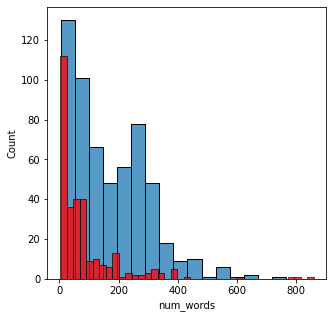

In [38]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.histplot(final_data[final_data['category'] == 0]['num_words'])
sns.histplot(final_data[final_data['category'] == 1]['num_words'],color='red')
plt.show()

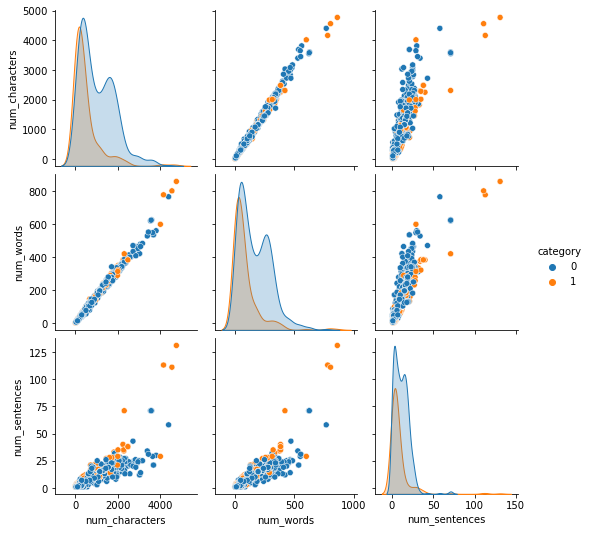

In [39]:
sns.pairplot(final_data,hue='category')
plt.show()

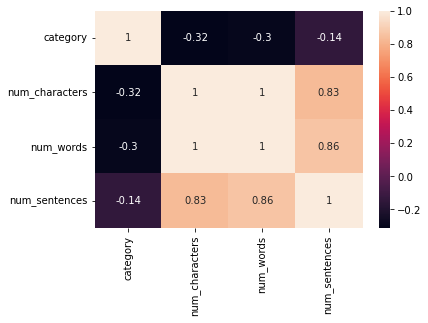

In [60]:
sns.heatmap(final_data.corr(),annot=True)
plt.show()

5. Word cloud

In [41]:
all_words =[]
for i in final_data['cleaned_text']:
    for j in range(len(i)):
        all_words.append(i[j])
print(all_words)

['get', 'placed', 'unicorn', 'hyper', 'growth', 'startup', 'global', 'mncs', 'hey', 'dream', 'company', 'chance', 'already', 'hiring', 'grad', 'strong', 'growing', 'network', 'pool', '240', 'hiring', 'partner', '400', 'company', 'grad', 'working', 'top', 'unicorn', 'like', 'flipkart', 'groww', 'cred', 'global', 'mncs', 'like', 'amazon', 'google', 'walmart', 'hyper', 'growth', 'startup', 'like', 'ather', 'jumbotail', 'briq', 'hired', 'grad', 'crio', 'turn', 'make', 'dream', 'company', 'reality', 'build', 'portfolio', 'validates', 'skill', 'gain', 'skill', 'amazing', 'enough', 'crack', 'job', 'best', 'company', 'get', 'free', 'trial', 'work', 'interactive', 'project', 'learn', 'dev', 'skill', 'real', 'time', 'leading', 'industry', 'mentor', 'apply', 'start', 'thank', 'rathinaco', 'founder', 'crio', 'unsubscribe', 'call', 'work', 'top', 'tech', 'company', 'high', 'paying', 'salary', 'hey', 'whopping', 'average', 'salary', 'hike', '89', 'crio', 'grad', 'working', '400', 'company', 'across'

In [42]:
all_text = ' '.join(all_words)
len(all_text)

863262

In [ ]:
#pip install wordcloud==1.8.1

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [44]:
wordcloud = WordCloud(width = 1800, height = 1800,
                background_color ='white',
                min_font_size = 10).generate(all_text)

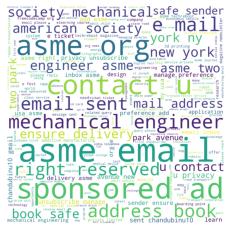

In [45]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [46]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        width = 1000,
        height = 1000,
        max_words = 100000,
        min_font_size= 5, 
        random_state= 2 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize= 20)
        fig.subplots_adjust(top= 2.7)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

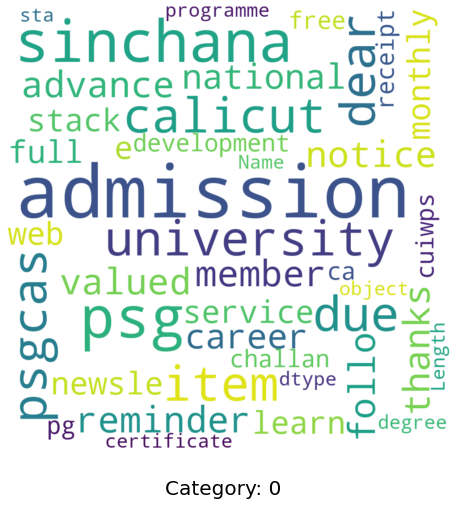

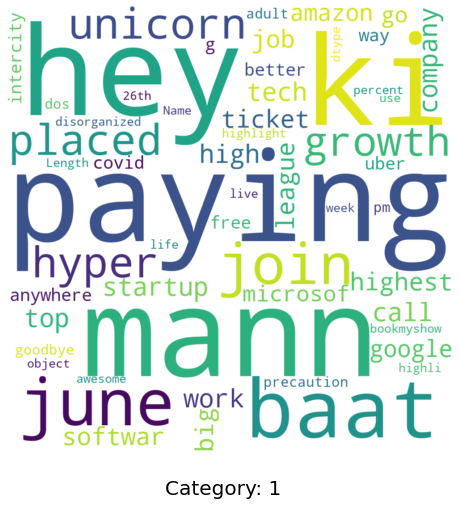

category
0    None
1    None
Name: cleaned_text, dtype: object

In [47]:
final_data['cleaned_text'].groupby(final_data['category']).apply(lambda x: show_wordcloud(x, title=f"Category: {x.name}"))

In [ ]:
from nltk.probability import FreqDist

In [ ]:
fdist = FreqDist(all_words)

In [ ]:
fdist.most_common(50)

In [ ]:
#final_data['cleaned_text'].groupby('category').apply(lambda x:  )

Text classification model

In [48]:
X = final_data['cleaned_text'].apply(lambda x: " ".join(x))
Y = final_data['category']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=200)

In [50]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(877,)
(438,)
(439,)


In [51]:
# transform the text data to feature vectors

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english',lowercase = True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
#print(X_train)

In [ ]:
#print(X_train_features)

In [52]:
model = GaussianNB()

In [53]:
# training the Naive Bayes model with the training data
model.fit(X_train_features.toarray(), Y_train)

GaussianNB()

In [54]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features.toarray())
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [55]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9954337899543378


In [56]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features.toarray())
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [57]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.8906605922551253


In [ ]:
#vectorizer = CountVectorizer()

In [62]:
input_mail = ["Hi Aman, "]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)
#input_data_features = vectorizer.fit_transform(input_mail)

# making prediction
prediction = model.predict(input_data_features.toarray())
print(prediction, type(prediction))

if (prediction[0] ==1):
    print('Spam mail')

else:
    print('Ham mail')

[1] <class 'numpy.ndarray'>
Spam mail


#SPAM

'Dear sir, kindly check your bank transactions',

'Your offer expires in 2 days',

'You won the lottery, Click the link below to claim',

'get 30% offer on google pay for first 3 trips if paying via google pay',

'get 30% offer on uber for first 3 trips if paying via phonepe',

'Your Christmas offers are here, follow us to get more updates'

#Ham

Your two tickets for the movie black panther are confirmed. Seat no. F3 and F4

Your password for Instagram has been successfully changed

The Password has been successfully changed
